In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [136]:
tape_width_data = pd.read_csv("CORC_rep_TWTS_cMatProp_path.csv")
tape_axial_data = pd.read_csv("CORC_rep_ATS_cMatProp_path.csv")
tape_width_data_rev = pd.read_csv("CORC_rep_TWTS_path_rev.csv")
tape_axial_data_rev = pd.read_csv("CORC_rep_ATS_path_rev.csv")
#tape_mpts_data = pd.read_csv("CORC_rep_MPTS_path (1).csv")
tape_mpts_data = pd.read_csv("MPTS-3mm-longpath-10N.csv")
tape_depth_data = pd.read_csv("CORC_rep_TDTS_path.csv")
tape_shear_data = pd.read_csv("CORC_rep_SS_path.csv")
tape_min_data = pd.read_csv("CORC_rep_minPTS_cMatProp_path.csv")

tape_node_mpts_data = pd.read_csv("MPTS-4mm-allnodes-10N.csv")

In [137]:
path_length = np.array(tape_mpts_data["S (mm)"])
path_strain = np.array(tape_mpts_data["EPTO1 ()"])

In [138]:
path_length_mc = np.array(pd.read_csv("MPTS-3mm-meshconv1-longpath-10N.csv")["S (mm)"])
path_strain_mc1 = np.array(pd.read_csv("MPTS-3mm-meshconv1-longpath-10N.csv")["EPTO1 ()"])
path_strain_mc2 = np.array(pd.read_csv("MPTS-3mm-meshconv2-longpath-10N.csv")["EPTO1 ()"])
#path_strain_mc3 = np.array(pd.read_csv("MPTS-4mm-meshconv3-longpath-10N.csv")["EPTO1 ()"])

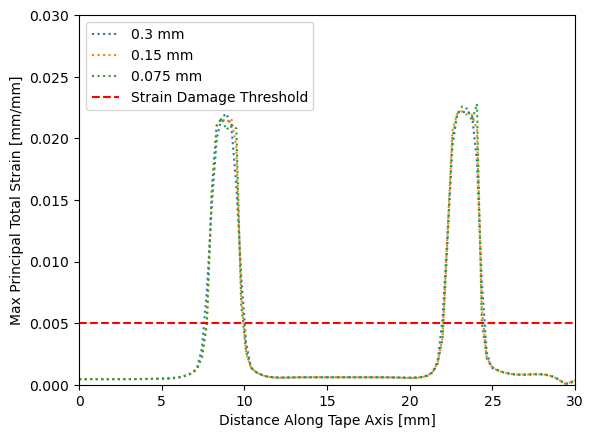

In [140]:
#plt.plot(path_length-10, path_strain, ls=":", label = "0.4 mm")
plt.plot(path_length_mc, path_strain, ls=":", label = "0.3 mm")#, c="darkgreen")
plt.plot(path_length_mc, path_strain_mc1, ls=":", label = "0.15 mm")#, c="darkviolet")
plt.plot(path_length_mc, path_strain_mc2, ls=":", label = "0.075 mm")#, c="mediumvioletred")
plt.axhline(0.005, ls= "--", c = "red", label = "Strain Damage Threshold")
plt.xlim(0,30)
plt.ylim(0, 0.03)
plt.xlabel("Distance Along Tape Axis [mm]")
plt.ylabel("Max Principal Total Strain [mm/mm]")
plt.legend()

In [141]:
coarse_node_strains = np.array(tape_node_mpts_data["EPTO1 ()"])
#meshconv0 = np.array(pd.read_csv("MPTS-2mm-meshconv-allnodes-10N.csv")["EPTO1 ()"])
meshconv1 = np.array(pd.read_csv("MPTS-3mm-meshconv1-allnodes-10N.csv")["EPTO1 ()"])
meshconv2 = np.array(pd.read_csv("MPTS-3mm-meshconv2-allnodes-10N.csv")["EPTO1 ()"])
#meshconv3 = np.array(pd.read_csv("MPTS-4mm-meshconv3-allnodes10N.csv")["EPTO1 ()"])
n_datapoints = len(coarse_node_strains)

<>:10: SyntaxWarning: invalid escape sequence '\c'
<>:10: SyntaxWarning: invalid escape sequence '\c'
/var/folders/9h/b6b760m97lgfjr740wktgcy80000gn/T/ipykernel_39793/940034829.py:10: SyntaxWarning: invalid escape sequence '\c'
  plt.title("3mm Tape, 10N Tension, 45$^{\circ}$ Winding")


Text(0.5, 1.0, '3mm Tape, 10N Tension, 45$^{\\circ}$ Winding')

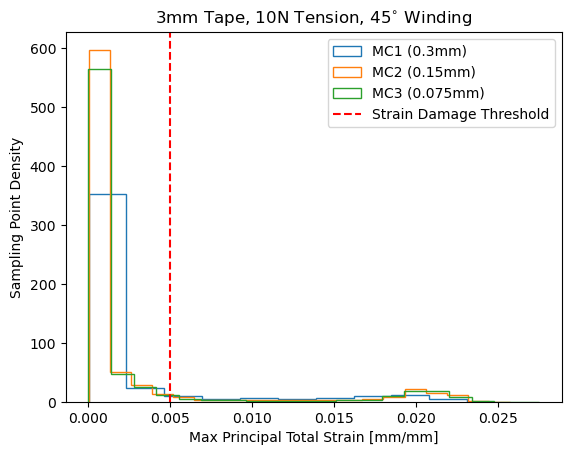

In [143]:
#plt.hist(coarse_node_strains, histtype = 'step', label = "coarse (0.4mm)", density = True)
plt.hist(coarse_node_strains, histtype = "step", label = "MC1 (0.3mm)", density = True)
#plt.hist(meshconv1, histtype = 'step', bins = 20)
plt.hist(meshconv1, histtype = 'step', bins = 20, label = "MC2 (0.15mm)", density = True)
plt.hist(meshconv2, histtype = 'step', bins = 20, label = "MC3 (0.075mm)", density = True)
plt.axvline(x=0.005, ls = "--", color = "red", label = "Strain Damage Threshold")
plt.xlabel("Max Principal Total Strain [mm/mm]")
plt.ylabel("Sampling Point Density")
plt.legend()
plt.title("3mm Tape, 10N Tension, 45$^{\circ}$ Winding")

In [144]:
def find_ret_vol(node_strains):
    badnodes = 0.
    for nodestrain in node_strains:
        if nodestrain >= 0.005:
            badnodes += 1.
    return 100*(1 - (badnodes/len(node_strains)))

In [145]:
#find damaged volume
ret_dict = {0.3:0., 0.15:0., 0.075:0.}#, 0.05:0.}
badnodes = 0.
#ret_dict[0.4] = find_ret_vol(coarse_node_strains)
ret_dict[0.3] = find_ret_vol(coarse_node_strains)
ret_dict[0.15] = find_ret_vol(meshconv1)
ret_dict[0.075] = find_ret_vol(meshconv2)

{0.3: 87.28655696988513, 0.15: 88.23440795420308, 0.075: 88.60399515552898}


Text(0.5, 1.0, 'Mesh Convergence 3mm Tape')

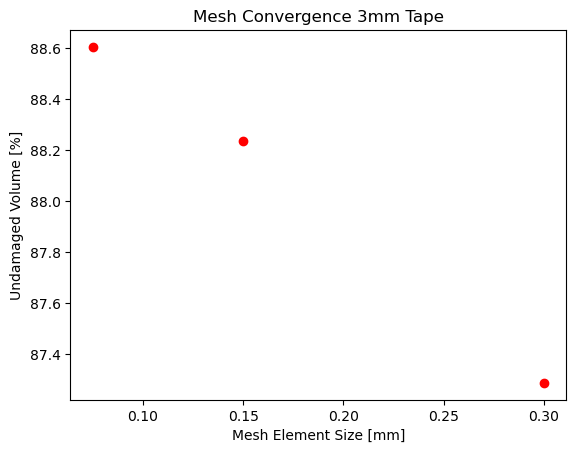

In [147]:
#NOTE: once more cores are available, need to refine once more
print(ret_dict)
plt.scatter(ret_dict.keys(), ret_dict.values(), color = "red")
plt.xlabel("Mesh Element Size [mm]")
plt.ylabel("Undamaged Volume [%]")
plt.title("Mesh Convergence 3mm Tape")

In [128]:
nodefractions0 = np.array(pd.read_csv("MPTS-2mm-allnodes-fraction-10N.csv")["EPTO1 ()"])
nodefractions1 = np.array(pd.read_csv("MPTS-2mm-meshconv1-allnodes-fraction-10N.csv")["EPTO1 ()"])
nodefractions2 = np.array(pd.read_csv("MPTS-2mm-meshconv2-allnodes-fraction-10N.csv")["EPTO1 ()"])

Text(0.5, 0, 'Nodal Fraction (Nodal Difference / Strain Value)')

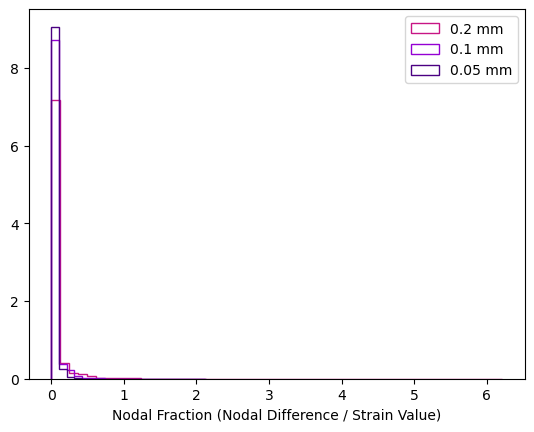

In [129]:
plt.hist(nodefractions0, color = "mediumvioletred", histtype = 'step', bins = 50, label = "0.2 mm", density = True)
plt.hist(nodefractions1, color = "darkviolet", histtype = 'step', bins=20, label = "0.1 mm", density = True)
plt.hist(nodefractions2, color = "indigo", histtype = 'step', bins=20, label = "0.05 mm", density = True)
plt.legend()
plt.xlabel("Nodal Fraction (Nodal Difference / Strain Value)")

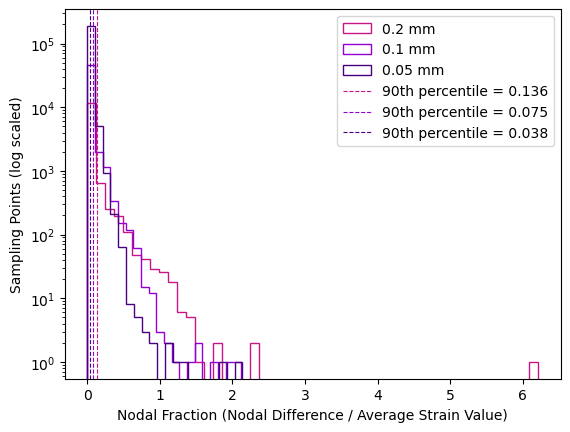

In [132]:
plt.hist(nodefractions0, color = "mediumvioletred", histtype = 'step', bins = 50, label = "0.2 mm")
plt.hist(nodefractions1, color = "darkviolet", histtype = 'step', bins=20, label = "0.1 mm")
plt.hist(nodefractions2, color = "indigo", histtype = 'step', bins=20, label = "0.05 mm")

plt.axvline(np.percentile(nodefractions0, 90), color = "mediumvioletred", lw = 0.8, ls = "--", 
            label = "90th percentile = "+str(round(np.percentile(nodefractions0, 90), 3)))
plt.axvline(np.percentile(nodefractions1, 90), color = "darkviolet", lw = 0.8, ls = "--",
            label = "90th percentile = "+str(round(np.percentile(nodefractions1, 90), 3)))
plt.axvline(np.percentile(nodefractions2, 90), color = "indigo", lw = 0.8, ls = "--",
            label = "90th percentile = "+str(round(np.percentile(nodefractions2, 90), 3)))
plt.xlabel("Nodal Fraction (Nodal Difference / Average Strain Value)")
plt.ylabel("Sampling Points (log scaled)")
plt.legend()
plt.yscale("log")

In [ ]:
csv_list = [tape_width_data, tape_axial_data, tape_width_data_rev, tape_axial_data_rev, 
    tape_depth_data, tape_mpts_data, tape_shear_data, tape_min_data]
path_var = []
for csv in csv_list:
    path_var.append(np.array(csv["S (mm)"]))
path_var = np.array(path_var)
path_var = path_var - 1


In [5]:
strain_var = []
strain_var.append(np.array(tape_width_data["EPTOX ()"][1:-1], dtype = float))
strain_var.append(np.array(tape_axial_data["EPTOY ()"][1:-1], dtype = float))
strain_var.append(np.array(tape_width_data_rev["EPTOX ()"][1:-1], dtype = float))
strain_var.append(np.array(tape_axial_data_rev["EPTOY ()"][1:-1], dtype = float))
strain_var.append(np.array(tape_depth_data["EPTOZ ()"][1:-1], dtype = float))
strain_var.append(np.array(tape_mpts_data["EPTO1 ()"][1:-1], dtype = float))
strain_var.append(np.array(tape_shear_data["EPTOXY ()"][1:-1], dtype = float))
strain_var.append(np.array(tape_min_data["EPTO3 ()"][1:-1], dtype = float))
strain_var = np.array(strain_var)

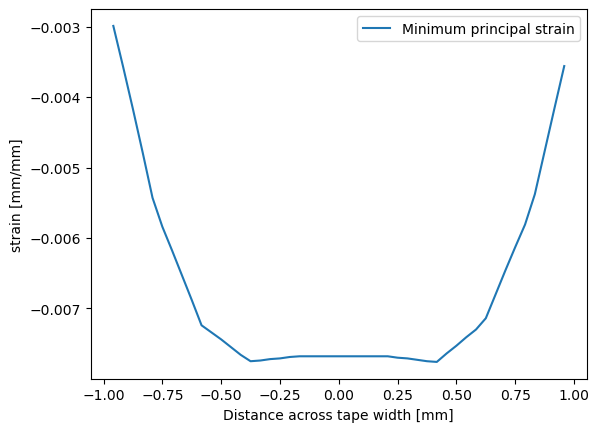

In [25]:
plt.plot(path_var[0][1:-1], strain_var[-1], label="Minimum principal strain")
plt.legend()
plt.xlabel("Distance across tape width [mm]")
plt.ylabel("strain [mm/mm]")
plt.show()

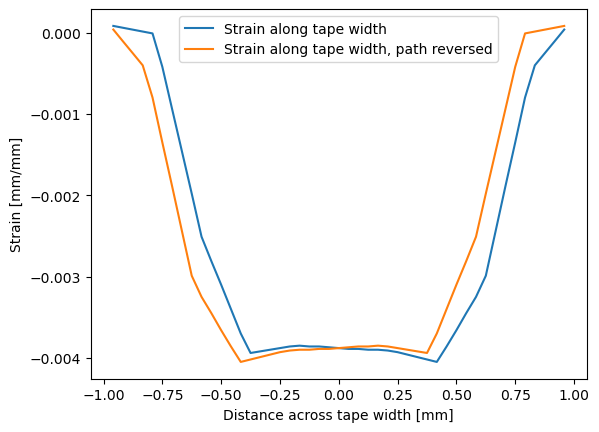

In [19]:
plt.plot(path_var[0][1:-1], strain_var[0], label="Strain along tape width")
plt.plot(path_var[0][1:-1], strain_var[2], label="Strain along tape width, path reversed")
plt.legend()
plt.xlabel("Distance across tape width [mm]")
plt.ylabel("Strain [mm/mm]")
plt.show()

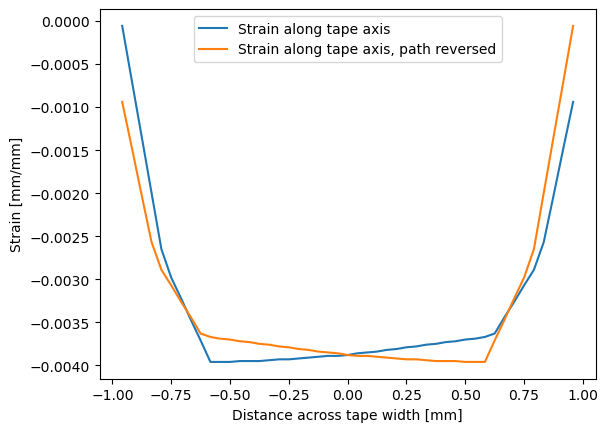

In [20]:
plt.plot(path_var[0][1:-1], strain_var[1], label="Strain along tape axis")
plt.plot(path_var[0][1:-1], strain_var[3], label="Strain along tape axis, path reversed")
plt.legend()
plt.xlabel("Distance across tape width [mm]")
plt.ylabel("Strain [mm/mm]")
plt.show()

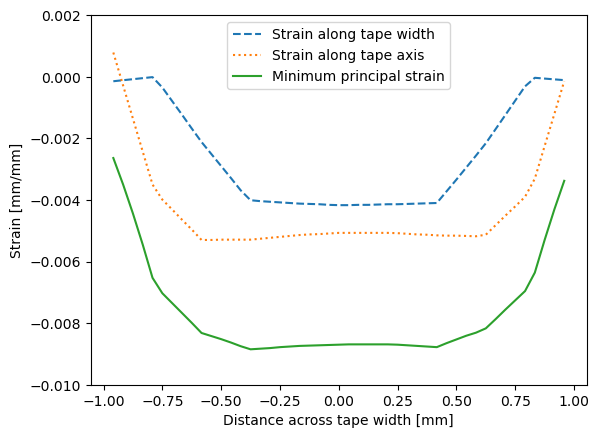

In [8]:
plt.plot(path_var[0][1:-1], strain_var[0], label="Strain along tape width", ls = "--")
plt.plot(path_var[1][1:-1], strain_var[1], label="Strain along tape axis", ls = ":")
plt.plot(path_var[2][1:-1], strain_var[-1], label="Minimum principal strain")
plt.xlabel("Distance across tape width [mm]")
plt.ylabel("Strain [mm/mm]")
plt.ylim(-.01, 0.002)
plt.legend()
plt.show()

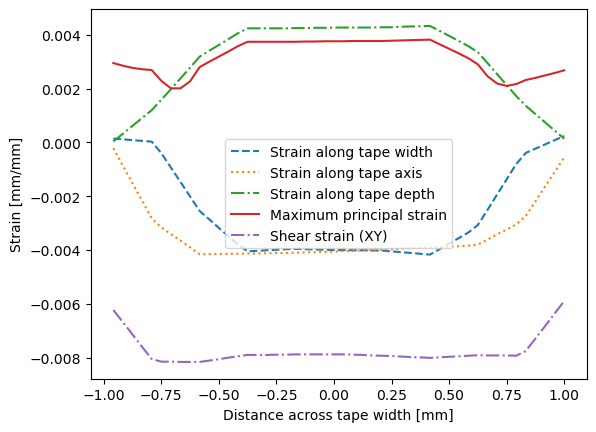

In [131]:
plt.plot(path_var[0][1:], strain_var[0], label="Strain along tape width", ls = "--")
plt.plot(path_var[1][1:], strain_var[1], label="Strain along tape axis", ls = ":")
plt.plot(path_var[1][1:], strain_var[2], label="Strain along tape depth", ls = "dashdot")
plt.plot(path_var[2][1:], strain_var[3], label="Maximum principal strain")
plt.plot(path_var[2][1:], strain_var[4], label="Shear strain (XY)", ls = "dashdot")
plt.xlabel("Distance across tape width [mm]")
plt.ylabel("Strain [mm/mm]")
plt.legend()
plt.show()

In [102]:
def find_principal_strains(e_xx, e_yy, e_zz, e_xy):
    #read in the data as arrays so we can do np manipulations
    lambda_z = e_zz
    a = 1
    b = -e_xx-e_yy
    c = e_yy*e_xx-e_xy**2
    lambda_plus = (e_xx + e_yy) / 2 + np.sqrt(((e_xx - e_yy)/2)**2 + e_xy**2)#(1/2)*(-b+np.sqrt(b**2 - 4 * a * c))
    lambda_minus = (e_xx + e_yy) / 2 - np.sqrt(((e_xx - e_yy)/2)**2 + e_xy**2)#(1/2)*(-b-np.sqrt(b**2 - 4 * a * c))

    return lambda_plus, lambda_minus, lambda_z

In [103]:
find_principal_strains(-.005, -.007, 0, 0.004)


(-0.0018768943743823398, -0.01012310562561766, 0)

In [104]:
manual_MPTS = find_principal_strains(strain_var[0], strain_var[1], strain_var[2], strain_var[4])

In [119]:
def find_shear(mpts, ex, ey):
    b = ex+ey
    a = ex*ey
    return np.sqrt(((2*mpts-b)**2-b**2)/4 + a)

In [120]:
find_shear(-0.01, -0.007, -0.005)

0.0038729833462074173

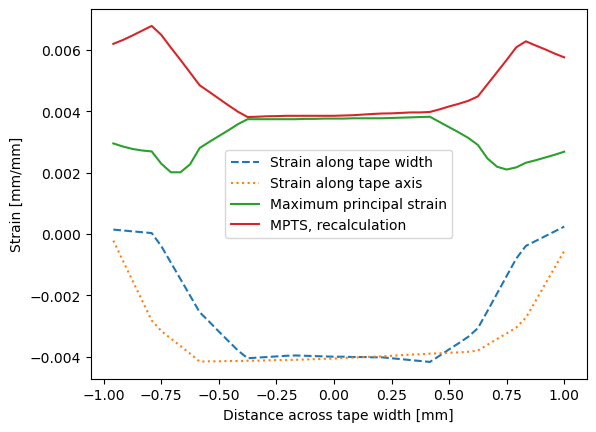

In [111]:
plt.plot(path_var[0][1:], strain_var[0], label="Strain along tape width", ls = "--")
plt.plot(path_var[1][1:], strain_var[1], label="Strain along tape axis", ls = ":")
#plt.plot(path_var[1][1:], strain_var[2], label="Strain along tape depth", ls = "dashdot")
plt.plot(path_var[2][1:], strain_var[3], label="Maximum principal strain")
#plt.plot(path_var[2][1:], strain_var[4], label="Shear strain (XY)", ls = "dashdot")
plt.plot(path_var[2][1:], manual_MPTS[0], label="MPTS, recalculation")
plt.xlabel("Distance across tape width [mm]")
plt.ylabel("Strain [mm/mm]")
plt.legend()

In [123]:
#the problem, then, is shear strain
find_shear(strain_var[3], strain_var[0], strain_var[1])

array([0.0029821 , 0.00318943, 0.00339366, 0.00360848, 0.00382911,
       0.00382606, 0.00399456, 0.00443811, 0.00513883, 0.00610213,
       0.00647294, 0.00683782, 0.00718766, 0.00754809, 0.0078299 ,
       0.00781984, 0.00780481, 0.00778977, 0.00777969, 0.00776968,
       0.00777977, 0.00777984, 0.0077899 , 0.00778994, 0.00777997,
       0.00778999, 0.00778   , 0.00777999, 0.00777499, 0.0077899 ,
       0.00780473, 0.00781948, 0.00783923, 0.00785384, 0.00757989,
       0.00729479, 0.0070184 , 0.00672054, 0.00632448, 0.00549253,
       0.00481345, 0.00430463, 0.00393876, 0.00369939, 0.00347576,
       0.00325463, 0.00303151, 0.00280909])

In [115]:
strain_var[4]

array([-0.00623, -0.00668, -0.00714, -0.0076 , -0.00805, -0.00815,
       -0.00815, -0.00816, -0.00816, -0.00816, -0.00811, -0.00806,
       -0.008  , -0.00795, -0.0079 , -0.0079 , -0.0079 , -0.00789,
       -0.00789, -0.00788, -0.00788, -0.00788, -0.00788, -0.00788,
       -0.00788, -0.00789, -0.0079 , -0.00792, -0.00793, -0.00794,
       -0.00796, -0.00798, -0.00799, -0.00801, -0.00799, -0.00797,
       -0.00795, -0.00793, -0.00791, -0.00792, -0.00792, -0.00792,
       -0.00793, -0.00775, -0.00729, -0.00683, -0.00636, -0.0059 ])

In [125]:
projected_MPTS = find_principal_strains(strain_var[0], strain_var[1], strain_var[2], find_shear(np.array([-0.01]*len(strain_var[0])), strain_var[0], strain_var[2]))

In [130]:
find_principal_strains(-0.004, -0.004, -0.003, 0.001)

(-0.003, -0.005, -0.003)

In [10]:
# 4mm
mpts_4el = pd.read_csv("MPTS-4mm-4el-180-hpath-10N.csv")
mpts_10el = pd.read_csv("MPTS-4mm-10el-180-hpath-10N.csv")
mpts_20el = pd.read_csv("MPTS-4mm-20el-180-hpath-10N.csv")
mpts_40el = pd.read_csv("MPTS-4mm-40el-180-hpath-10N.csv")

In [13]:
mpts_4el_S = mpts_4el["S (mm)"]
mpts_10el_S = mpts_10el["S (mm)"]
mpts_20el_S = mpts_20el["S (mm)"]
mpts_40el_S = mpts_40el["S (mm)"]


mpts_4el_strain = mpts_4el["EPTO1 ()"]
mpts_10el_strain = mpts_10el["EPTO1 ()"]
mpts_20el_strain = mpts_20el["EPTO1 ()"]
mpts_40el_strain = mpts_40el["EPTO1 ()"]

max_dict = {1:max(mpts_4el_strain), 0.4:max(mpts_10el_strain), 0.2:max(mpts_20el_strain), 0.1:max(mpts_40el_strain)}

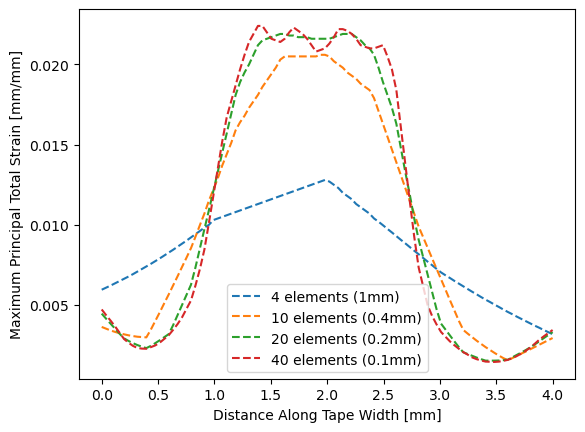

In [12]:
plt.plot(mpts_4el_S, mpts_4el_strain, label="4 elements (1mm)", ls = "--")
plt.plot(mpts_10el_S, mpts_10el_strain, label = "10 elements (0.4mm)", ls = "--")
plt.plot(mpts_20el_S, mpts_20el_strain, label = "20 elements (0.2mm)", ls = "--")
plt.plot(mpts_40el_S, mpts_40el_strain, label = "40 elements (0.1mm)", ls = "--")
plt.xlabel("Distance Along Tape Width [mm]")
plt.ylabel("Maximum Principal Total Strain [mm/mm]")
plt.legend()

Text(0, 0.5, 'Maximum MPTS Along Horizontal Path [mm/mm]')

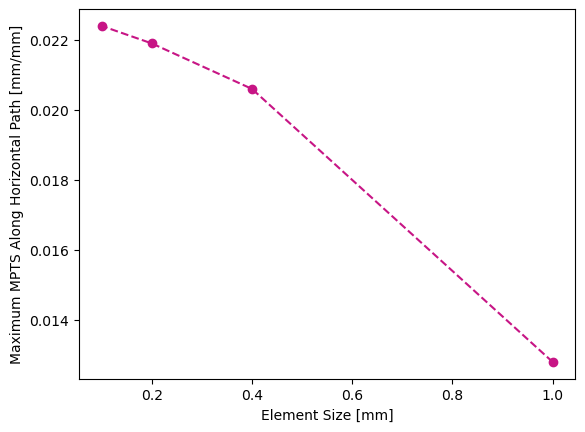

In [40]:
plt.plot(max_dict.keys(), max_dict.values(), linestyle = "--", color="mediumvioletred")
plt.scatter(max_dict.keys(), max_dict.values(), marker = "o", color="mediumvioletred")
plt.xlabel("Element Size [mm]")
plt.ylabel("Maximum MPTS Along Horizontal Path [mm/mm]")

In [41]:
mpts_right_edge = pd.read_csv("MPTS-6mm-180-right-edge-10N.csv")
mpts_left_edge = pd.read_csv("MPTS-6mm-180-left-edge-10N.csv")
mpts_axial = pd.read_csv("MPTS-6mm-180-axial-10N.csv")

In [42]:
MRE_strain = mpts_right_edge["EPTO1 ()"]
MLE_strain = mpts_left_edge["EPTO1 ()"]
MA_strain = mpts_axial["EPTO1 ()"]

MRE_path = mpts_right_edge["S (mm)"]
MLE_path = mpts_left_edge["S (mm)"]
MA_path = mpts_axial["S (mm)"]

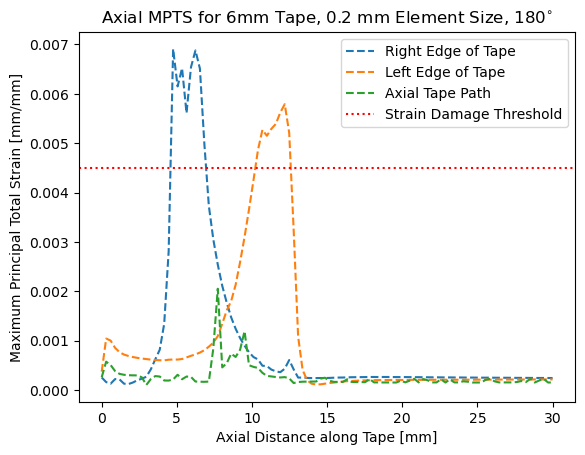

In [46]:
plt.plot(MRE_path, MRE_strain, ls = "--", label = "Right Edge of Tape")
plt.plot(MLE_path, MLE_strain, ls = "--", label = "Left Edge of Tape")
plt.plot(MA_path, MA_strain, ls = "--", label = "Axial Tape Path")
plt.axhline(0.0045, ls = ":", color = "red", label = "Strain Damage Threshold")
plt.xlabel("Axial Distance along Tape [mm]")
plt.ylabel("Maximum Principal Total Strain [mm/mm]")
plt.title("Axial MPTS for 6mm Tape, 0.2 mm Element Size, 180$^{\\circ}$")
plt.legend()

In [48]:
right_max_index = np.argmax(MRE_strain)
left_max_index = np.argmax(MLE_strain)
print(mpts_right_edge["Z Coordinate (mm)"][right_max_index])
print(mpts_left_edge["Z Coordinate (mm)"][left_max_index])

3.9463
13.44
